#### Utwórz mapę statyczną ilustrującą zmiany w gęstości zaludnienia w Europie w latach 2014-2017.

1. Wczytaj dane z plików countries.geojson i population_density.geojson.

In [17]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json

gdf = gpd.read_file('population_density.geojson')
gdf_c = gpd.read_file('countries.geojson')

2. Przeprowadź projekcję danych na EPSG:3857 (Web Mercator).

In [18]:
gdf = gdf.to_crs(epsg=3857)
gdf_c = gdf_c.to_crs(epsg=3857)

3. Oblicz procentową zmianę gęstości zaludnienia między rokiem 2014 a rokiem 2017.

In [19]:
gdf['PopDen_Change_Perc'] = ((gdf['PopDen_PD2017'] - gdf['PopDen_PD2014']) / gdf['PopDen_PD2014']) * 100

4. Przeprowadź kategoryzację procentowej zmiany gęstości zaludnienia na przedziały o wartościach -5, 0, 5, 10.

In [20]:
bins = [-np.inf, -5, 0, 5, 10, np.inf]
labels = [
    '<= -5%',
    '(-5% , 0%]',
    '(0%, 5%]',
    '(5%, 10%]',
    '> 10%'
]

gdf['Change_Category'] = pd.cut(
    gdf['PopDen_Change_Perc'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)

category_order = pd.CategoricalDtype(categories=labels, ordered=True)
gdf['Change_Category'] = gdf['Change_Category'].astype(category_order)

#### Tworzenie mapy:
5. Na mapie zamieść dane dotyczące krajów i gęstości zaludnienia (wykorzystując rezultaty kategoryzacji).
6. Dobierz mapę kolorów.
7. Dopasuj współrzędne geograficzne tak, aby mapa prezentowała przede wszystkim kraje europejskie.
8. Zadbaj o czytelność i przejrzystość mapy, m.in. poprzez wyświetlenie tytułu wykresu i legendy, a także dobór kolorów pozostałych elementów.
9. Umieść informację o źródle danych w lewym dolnym rogu wykresu ("Data source: Eurostat").
10. Zapisz mapę do pliku w formacie PNG.

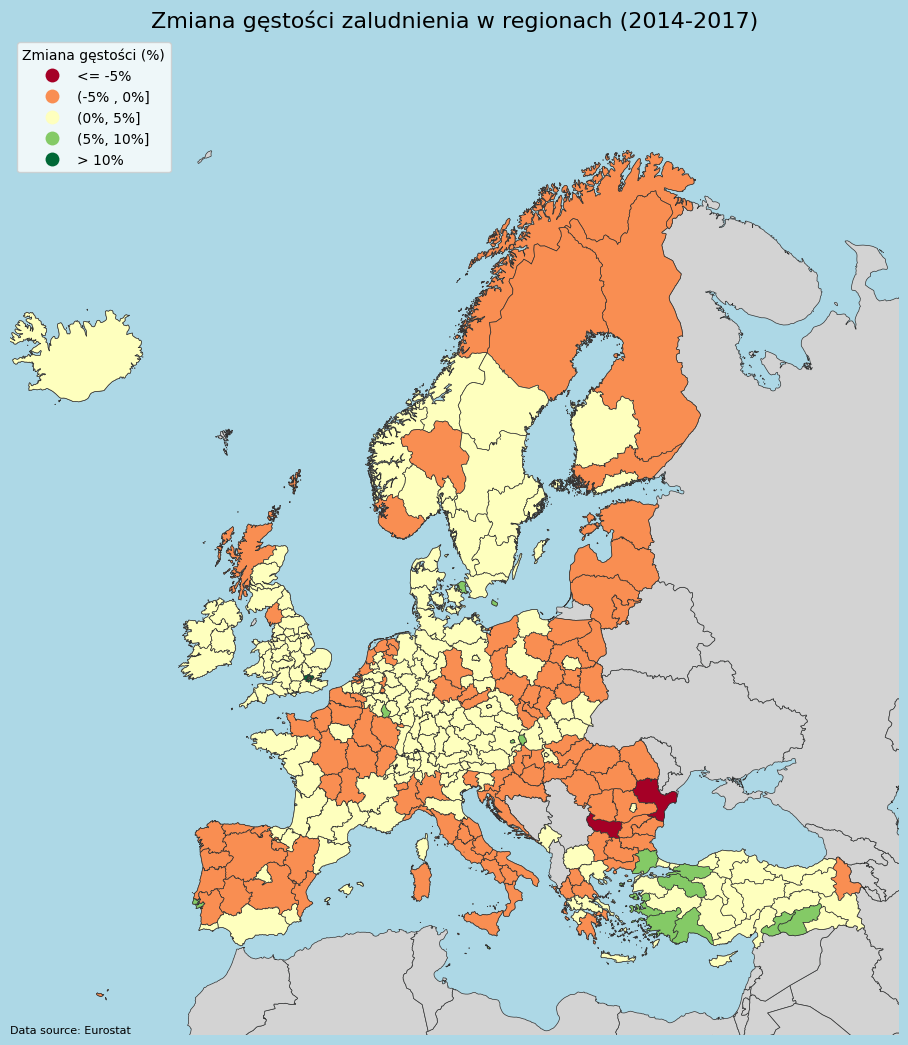

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

gdf_c.plot(
    ax=ax,
    color='lightgray',
    linewidth=0.5,
    edgecolor='0.2'
)

gdf.plot(
    ax=ax,
    column='Change_Category',
    cmap='RdYlGn',
    linewidth=0.5,
    edgecolor='0.2',
    legend=True,
    legend_kwds={
        'loc': 'upper left',
        'title': 'Zmiana gęstości (%)',
        'fontsize': 10
    }
)

fig.set_facecolor("lightblue")

ax.set_axis_off()

ax.set_xlim(-2700000, 5300000)
ax.set_ylim(3500000, 12500000)

ax.set_title('Zmiana gęstości zaludnienia w regionach (2014-2017)', fontsize=16)

ax.text(0, 0, "Data source: Eurostat", fontsize=8, ha='left', va='bottom', transform=ax.transAxes)

plt.savefig("map.png")